In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from clustering_package.model.kmeans import KMeans
from clustering_package.metrics import silhouette_score

import sklearn.cluster as cluster
from sklearn.datasets import load_digits

KMeans: 0.6534685336774297
Sklearn.KMeans: 0.6534685336774297


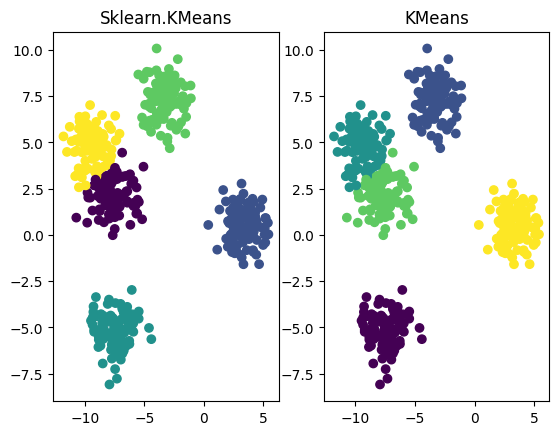

In [32]:
X, y = make_blobs(n_samples=500, centers=5, random_state=43)

kmeans = KMeans(n_clusters=5)

kmeans2 = cluster.KMeans(n_clusters=5)

print(f'KMeans: {silhouette_score(X, kmeans.fit_predict(X))}')
print(f'Sklearn.KMeans: {silhouette_score(X, kmeans2.fit_predict(X))}')

plt.subplot(121)
plt.title('Sklearn.KMeans')
plt.scatter(X[:, 0], X[:, 1], c=kmeans2.labels_)

plt.subplot(122)
plt.title('KMeans')
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)

plt.show()


In [34]:
X, y_true = load_digits(return_X_y=True)

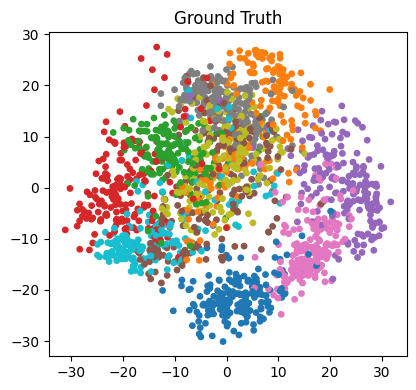

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 4))

# Kết quả thật
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='tab10', s=15)
plt.title("Ground Truth")

plt.tight_layout()
plt.show()

In [57]:
kmeans2 = cluster.KMeans(n_clusters=10, n_init=20, random_state=45)
y_pred_2 = kmeans2.fit_predict(X)

kmeans = KMeans(n_clusters=10,n_init=20, random_state=45)
y_pred = kmeans.fit_predict(X)

In [58]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(y_true, y_pred)
print("Adjusted Rand Index (ARI) KMeans:", ari)

ari_2 = adjusted_rand_score(y_true, y_pred_2)
print("Adjusted Rand Index (ARI) Sklearn.KMeans:", ari_2)


Adjusted Rand Index (ARI) KMeans: 0.6399115646457103
Adjusted Rand Index (ARI) Sklearn.KMeans: 0.6618502851160484


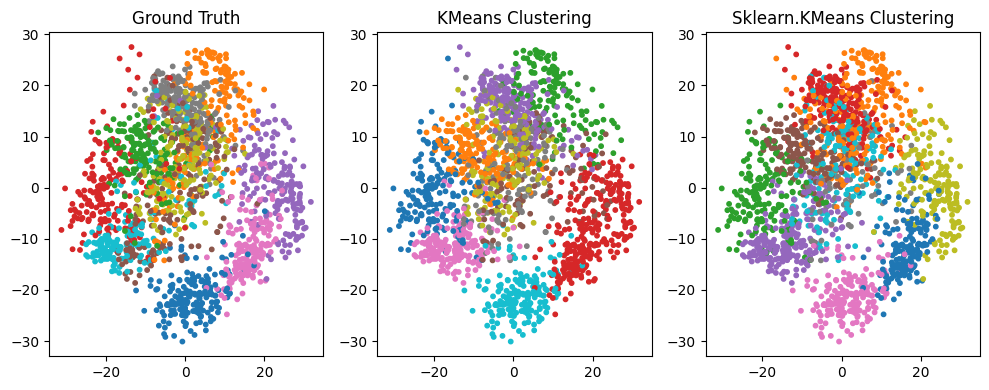

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Phân cụm theo nhãn thật
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='tab10', s=10)
plt.title("Ground Truth")

# Phân cụm theo KMeans
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='tab10', s=10)
plt.title("KMeans Clustering")

# Phân cụm theo KMeans
plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_2, cmap='tab10', s=10)
plt.title("Sklearn.KMeans Clustering")

plt.tight_layout()
plt.show()